In [1]:
%matplotlib inline

### 1 (2)  Neural networks as function approximators.
Design a feed-forward neural network to approximate the 1-dimensional function given in Fig. 1 on the following page. The output should match exactly. 

* How many hidden layers do you need? 
* How many units are there within each layer? Show the hidden layers, units, connections, weights, and biases.

Use the ReLU nonlinearity for every unit. Every possible path from input to output must pass
through the same number of layers. This means each layer should have the form:

$Y_i = \sigma(W_{i}Y_{i-1}^{T} + \beta_i) $

where

$Y_i \in \mathbb{R}^{d_ix1}$
    output of the ith layer
    
$W_i \in \mathbb{R}^{d_i x d_{i-1}}$

weight matrix for that layer
Y0 is x 

ReLU is defined as :

$\sigma(x) =  
        \begin{cases} 
            x & \quad x>=0\\
            0 & \quad \text{otherwise}\\
        \end{cases}
$
                  
Writing out the figure as bunch of equations in form of ReLU units:

$f(x) =  
        \begin{cases} 
            0*x         & \quad 0<=x<=1\\
            2*x - 2     & \quad 1<=x<=2\\
            1/3*x + 4/3 & \quad 2<=x<=5\\
            2*x-7       & \quad 5<=x<=6\\
            15-5/3*x    & \quad 6<=x<=9\\
            0*x         & \quad 9<=x<=10\\
        \end{cases}
$

Rewriting the above equation in terms of the ReLU units:

$f(x) =  
        \begin{cases} 
            \sigma(0*x) &  \\
            \sigma(2*x - 2) - \sigma(2*x - 4)         \\
            \sigma(1/3*x - 2/3) - \sigma(1/3*x - 5/3) \\
            \sigma(2*x - 10) - \sigma(2*x - 12)       \\
            -\sigma(5/3*x - 10) + \sigma(5/3*x - 15)  \\
        \end{cases}
$

Now writing the weight and the bias vector for the Neural network. This will have :

1 input layer with 1 neuron for input x
1 hidden layer full-connected with 8 neurons
1 output layer with 1 neuron for output y

$$ W_{(input)(hidden)}    = [0, 2, 2, 1/3, 1/3, 2, 2, 5/3, 5/3]$$

$$ W_{(hidden)(output)}^T = [1, 1, -1, 1, -1, 1, -1, -1, 1]$$

$$ Bias_{(input)(hidden)} = [0, -2, -4, -2/3, -5/3, -10, -12, -10, -15]$$

[[ 6.78012323]
 [ 4.16539049]
 [ 0.85232437]
 [ 6.56306553]
 [ 2.96442103]
 [ 5.87186193]
 [ 4.19612551]
 [ 9.11175632]
 [ 6.40105534]
 [ 2.57696867]] [[ 13.56024647]
 [  8.33078098]
 [  0.        ]
 [ 13.12613106]
 [  5.92884207]
 [ 11.74372387]
 [  8.39225101]
 [ 14.88824368]
 [ 12.80211067]
 [  5.15393734]]
(8000, 1) (8000, 1)


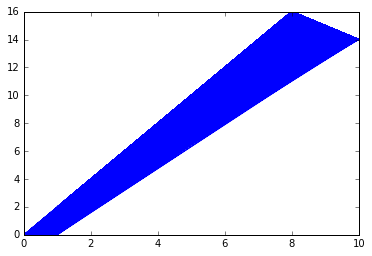

In [72]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(1000)

# Global configuration parameters for training the network
learning_rate = 0.01
training_epochs = 1000
num_samples = 10000
batch_size = 1000

# Global configuration parameters for configuring the network
n_input = 1
n_output = 1
n_hidden = 20
train_test_split = 0.8
train_size = int(train_test_split*num_samples)

def fn(x):
    if ((x) <= 1.0):
        return 0.0
    elif ((x) > 1.0 and (x) <= 2.0):
        return (2.0*x -2.0)
    elif ((x) > 2.0 and (x) <= 5.0):
        return (0.3333*x + 1.3333)
    elif ((x) > 5.0 and (x) <= 6.0 ):
        return (2.0*x -7.0)
    elif ((x) > 6.0 and (x) <= 9.0):
        return (15.0 - 1.6666*x)
    elif ((x) > 9.0):
        return 0.0
def fn1(x):
    if (x <= 1.0):
        return 0.0
    elif ((x > 1.0) and (x <= 8.0)) :
        return 2.0*x
    elif (x > 8.0):
        return 24.0 - x

# Check the shape of the input is as expected
xval = np.float32(np.random.uniform(0.0, 10.0, num_samples))  # 8000 training examples
xval = np.reshape(xval, (num_samples, 1))
np.random.shuffle(xval)
npfn = np.vectorize(fn1)
xtrain = xval[:train_size]
xtest = xval[train_size:]
ytrain = npfn(xtrain)
ytest = npfn(xtest)
#ytrain = np.float32([fn1(tmp) for tmp in xtrain])
#ytest = np.float32([fn1(tmp) for tmp in xtest])
print xtrain[:10], ytrain[:10]
print xtrain.shape, ytrain.shape
plt.plot(xtrain[:], ytrain[:])
plt.show()

In [73]:
tf.set_random_seed(1234)
#Function for the model of NN
def model(inputs, weights, biases):
    """ 
        Single layer perceptron with ReLU activation
    """
    layer = tf.nn.relu(tf.add(tf.matmul(inputs, weights['h01']), biases['b01']))
    return tf.add(tf.matmul(layer, weights['out']), biases['out'])

# Step0 - Preprocessing and setting up the Graph
x = tf.placeholder(tf.float32, shape=(None, 1), name="X")  # Input is 1-D dimensional variable
y = tf.placeholder(tf.float32, shape=(None, 1), name="Y")  # Output is 1-D dimentional variable

W = {'h01': tf.Variable(tf.random_normal([n_input, n_hidden], stddev=0.01, dtype=tf.float32)),
     'out': tf.Variable(tf.random_normal([n_hidden, n_input], stddev=0.01, dtype=tf.float32))
     }
b = {'b01': tf.Variable(tf.zeros([n_input,n_hidden], dtype=tf.float32)),
     'out': tf.Variable(tf.zeros([n_output, n_output], dtype=tf.float32))
    }

# Step1 - Construct the model
pred = model(x, W, b)

# Step2 - Define loss
cost = tf.nn.l2_loss(pred-y)

# Step3 - Optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

# Step4 - Training
init = tf.initialize_all_variables()



Epoch: 0001 cost= 116347.148437500
Epoch: 0101 cost= 1691.350585938
Epoch: 0201 cost= 1541.190795898
Epoch: 0301 cost= 1494.390869141
Epoch: 0401 cost= 1489.936401367
Epoch: 0501 cost= 1489.958129883
Epoch: 0601 cost= 1489.941040039
Epoch: 0701 cost= 1489.901977539
Epoch: 0801 cost= 1489.853393555
Epoch: 0901 cost= 1489.800415039
Done
[[  8.50089455]
 [ 13.82581234]
 [  4.32981825]
 [ 15.88563347]
 [  1.89020181]
 [  4.58699036]
 [  4.20745134]
 [  1.23783517]
 [ 10.85723209]
 [ 16.47042847]]
(2000, 1)


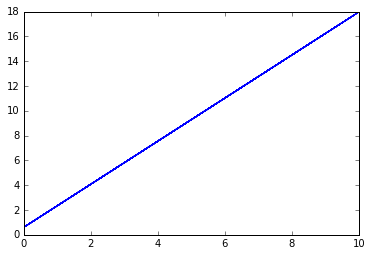

In [74]:
with tf.Session() as sess:
    sess.run(init)
    
    # Set logs writer into folder /tmp/tensorflow_logs
    # summary_writer = tf.train.SummaryWriter('/tmp/tensorflow_logs', graph_def=sess.graph_def)
    for epoch in range(training_epochs):
        num_batches = xtrain.shape[0]/batch_size
        
        for i in range(num_batches):
            # Fit training running using data
            batchX = xtrain[i*batch_size:(i+1)*batch_size]
            batchY = ytrain[i*batch_size:(i+1)*batch_size]
            sess.run(opt, feed_dict={x:batchX, y:batchY})
        
        # compute loss
        c = sess.run(tf.nn.l2_loss(pred-ytest), feed_dict={x:xtest})
        if (epoch % 100 == 0):
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c)
        #print "Pred : ", (p[:10])
    
    print "Done"
    p = sess.run(pred, feed_dict={x:xtest, y:ytest})
    print p[0:10]
    print p.shape
    plt.plot(xtest, p)
    plt.show()
    
    """
    print "cost=", sess.run(cost, feed_dict={x:xtrain, y:ytrain}), \
        "W=", sess.run(W['h01']), "b=", sess.run(b['b01'])
    # Step5 - Testing
    correct_prediction = tf.less(tf.abs(tf.sub(pred, y)), 1)
    
    # Accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print "Accuracy: ", accuracy.eval({x:xtest, y:ytest})
    """